In [29]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

#read data
df = pd.read_csv(r'/Users/sandesh/Downloads/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
#Looking for missing data

for col in df.columns:
    missing_pct = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_pct))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [32]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [51]:
df.dropna(subset=['budget','gross'],inplace=True)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [63]:
#Highest Grossing Movies
pd.set_option('display.max_rows', 14)
df.sort_values(by=['gross'], inplace= False, ascending=False)



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [64]:
#Drop duplicates

#df['name'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [65]:
# Duplicate names
unique_duplicates = df[df.duplicated(subset=['name'], keep=False)]['name'].unique()
print(unique_duplicates)


['Friday the 13th' 'The Fog' 'The Island' 'Clash of the Titans'
 'Halloween II' 'Neighbors' 'The Thing' 'Conan the Barbarian' 'Annie'
 'Poltergeist' 'Parasite' 'Sahara' 'Hercules' 'Ghostbusters'
 'The Karate Kid' 'A Nightmare on Elm Street' 'Red Dawn' 'Footloose'
 'Impulse' 'Legend' 'Fright Night' 'Fever Pitch' 'The Hitcher' 'Heat'
 'RoboCop' 'Overboard' 'Project X' 'Rampage' "Child's Play" 'Cocktail'
 'Hairspray' 'Pulse' 'Pet Sematary' 'Sing' 'Total Recall'
 'Teenage Mutant Ninja Turtles' 'Flatliners' 'The Rookie' 'Trust'
 'Where the Heart Is' 'Point Break' 'The Addams Family'
 'Beauty and the Beast' 'Rush' 'Under Suspicion' 'Aladdin' 'Gladiator'
 'Trespass' 'Hero' 'The Three Musketeers' 'Deadfall' 'The Lion King'
 'Little Women' 'The Jungle Book' 'The Postman' "Nobody's Fool"
 'No Escape' 'Fair Game' 'Safe' 'The Hunted' 'Bad Company' 'Crash'
 'Hamlet' 'Unforgettable' 'Anna Karenina' 'Godzilla' 'The Avengers'
 'Twilight' 'The Mummy' 'Life' 'The Gift' 'Shaft' 'The Kid' 'No Good Deed'
 

<Axes: xlabel='genre', ylabel='gross'>

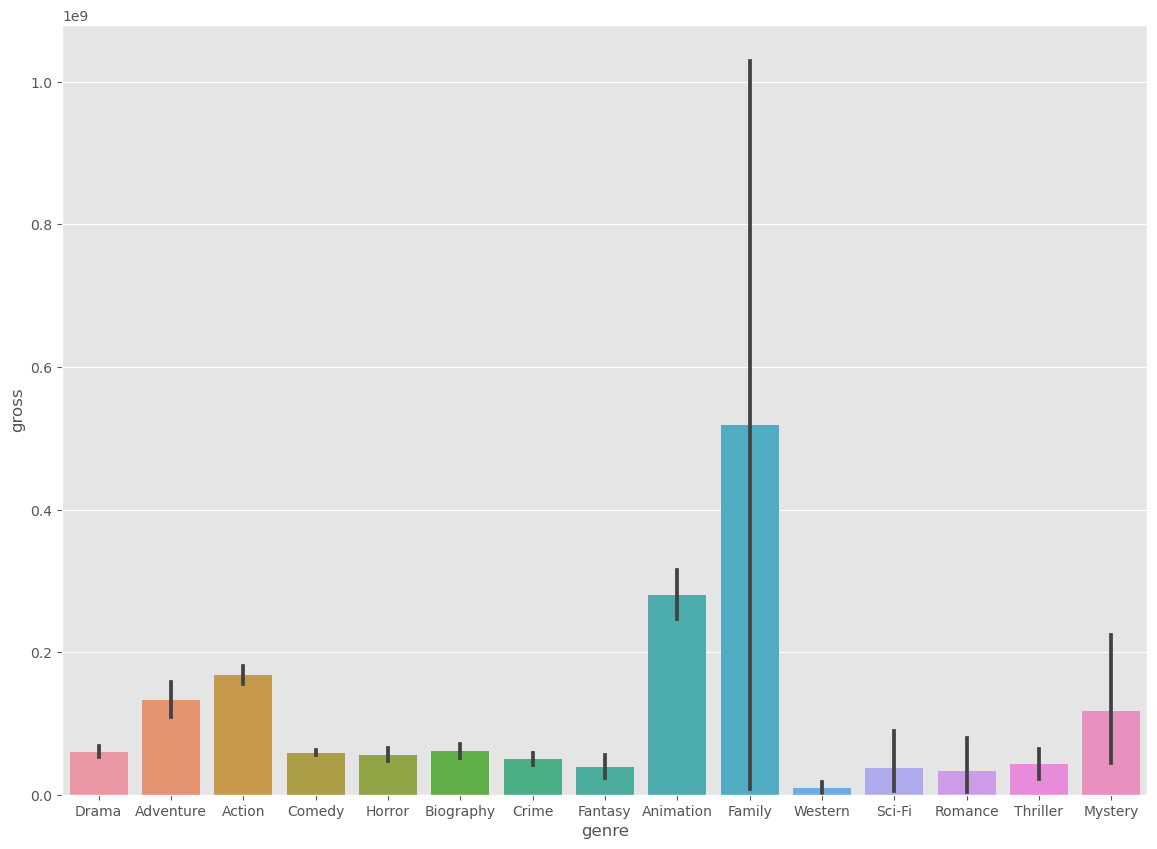

In [66]:
sns.barplot(x= df['genre'], y = df['gross'])

Text(0, 0.5, 'Gross Earnings')

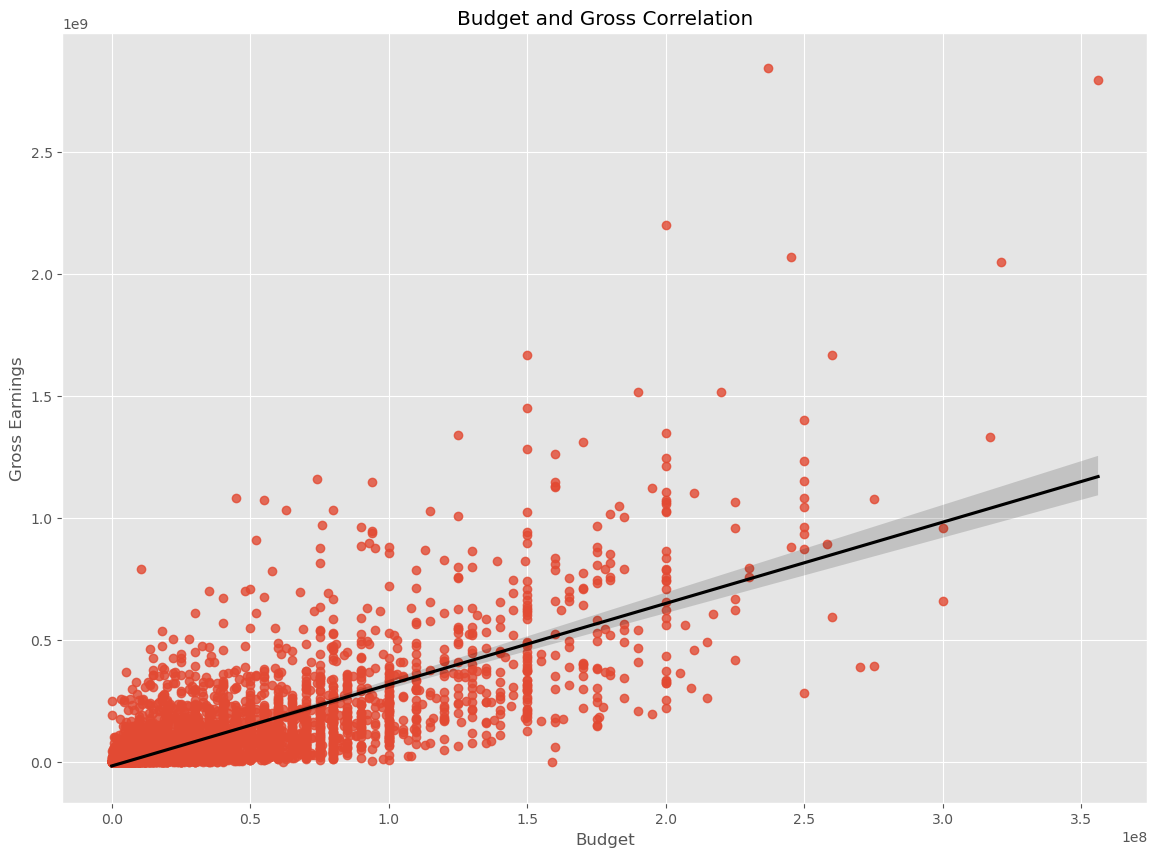

In [78]:
sns.regplot(x= df['budget'], y = df['gross'], line_kws={"color":"black"})
plt.title('Budget and Gross Correlation')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')

In [88]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method='pearson') #pearson, kendall, spearman

Text(145.72222222222223, 0.5, 'Movie Features')

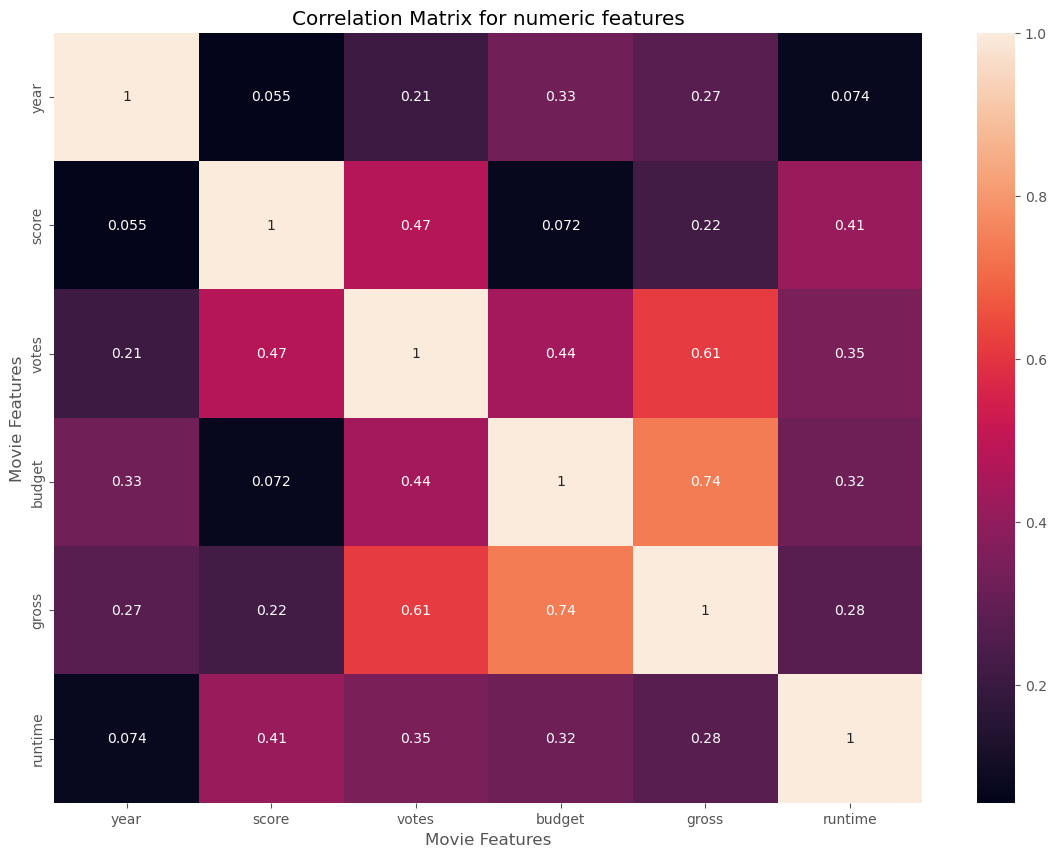

In [89]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [90]:
# to convert the string/object columns into number
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [92]:
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4706,6,6,1980,1308,8.4,927000.0,1800,2841,700,46,19000000,46998772,1432,146.0
1,3943,6,1,1980,1131,5.8,65000.0,1581,1160,215,47,4500000,58853106,454,104.0
2,3654,4,0,1980,1363,8.7,1200000.0,759,1822,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1416,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,352,272,47,6000000,39846344,1089,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,907,6.6,140000.0,17,2397,1819,47,90000000,426505244,454,124.0
7649,3569,4,0,2020,715,6.5,102000.0,854,2316,148,47,85000000,319715683,1114,99.0
7650,1156,4,1,2020,907,5.6,53000.0,1814,2836,1474,47,175000000,245487753,1403,101.0
7651,3992,4,1,2020,760,6.8,42000.0,296,2096,641,6,135000000,111105497,12,100.0


# Verdict
The correlation between gross and budget is high at 0.74. Likewise, the correlation between gross and votes is also relatively high at 0.61